<a href="https://colab.research.google.com/github/lankutse/ann-final/blob/main/sequential_longer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Input
from keras.models import Model

num_filters = 10
filter_size = 3
pool_size = 2

basic = keras.models.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    Conv2D(15, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(25, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(40, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(40, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(80, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='sigmoid'),
])

basic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(name = 'binary accuracy'),
                                                                     tf.keras.metrics.AUC(name = 'AUC')])

history = basic.fit(X_train, y_train, epochs=12, batch_size=100, validation_split=0.2)

# Print training results
print("Training history keys:", history.history.keys())

# Example: Print accuracy and loss after training
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])



Epoch 1/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 166s 6s/step - AUC: 0.4950 - accuracy: 0.2000 - binary accuracy: 0.7555 - loss: 0.5808 - val_AUC: 0.5063 - val_accuracy: 0.1800 - val_binary accuracy: 0.7929 - val_loss: 0.5192
Epoch 2/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - AUC: 0.5110 - accuracy: 0.2201 - binary accuracy: 0.7910 - loss: 0.5317 - val_AUC: 0.5154 - val_accuracy: 0.2229 - val_binary accuracy: 0.7929 - val_loss: 0.5111
Epoch 3/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - AUC: 0.5130 - accuracy: 0.2113 - binary accuracy: 0.7922 - loss: 0.5227 - val_AUC: 0.5149 - val_accuracy: 0.2243 - val_binary accuracy: 0.7929 - val_loss: 0.5117
Epoch 4/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - AUC: 0.5110 - accuracy: 0.2191 - binary accuracy: 0.7911 - loss: 0.5255 - val_AUC: 0.5139 - val_accuracy: 0.2057 - val_binary accuracy: 0.7929 - val_loss: 0.5114
Epoch 5/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 199s 6s/step - AUC: 0.5296 - accuracy: 0.2348 - binary accuracy: 0.7918 - loss: 0.5198 - val_AUC: 0.51

In [ ]:
results = basic.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", results[0])
print("Binary Accuracy:", results[1])
print("AUC:", results[2])

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - AUC: 0.5423 - accuracy: 0.2542 - binary accuracy: 0.7931 - loss: 0.5220
Test Loss: 0.5248586535453796
Binary Accuracy: 0.23777778446674347
AUC: 0.7937778830528259


29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 495ms/step


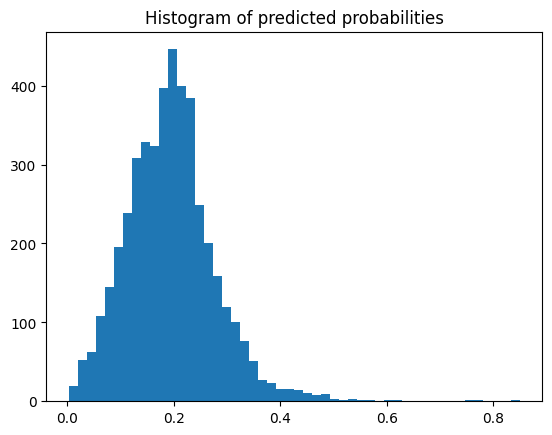

In [ ]:
import matplotlib.pyplot as plt

y_pred_probs = basic.predict(X_test)
plt.hist(y_pred_probs.flatten(), bins=50)
plt.title("Histogram of predicted probabilities")
plt.show()

In [ ]:
print("Mean positive label rate:", y_train.mean())

Mean positive label rate: 0.20794285714285715


In [ ]:

print("Mean predicted probability:", np.mean(y_pred_probs))

Mean predicted probability: 0.19370939


In [ ]:
threshold = 0.2
y_pred_binary = (y_pred_probs >= threshold).astype(int)

from sklearn.metrics import accuracy_score, f1_score
print("Binary Accuracy:", accuracy_score(y_test.flatten(), y_pred_binary.flatten()))
print("F1 Score:", f1_score(y_test.flatten(), y_pred_binary.flatten()))

Binary Accuracy: 0.5346666666666666
F1 Score: 0.29684351914036267


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

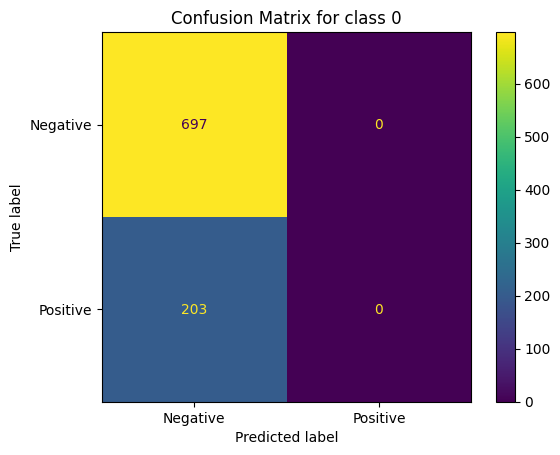

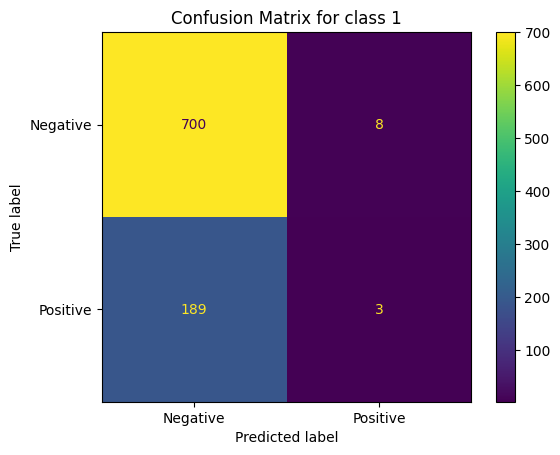

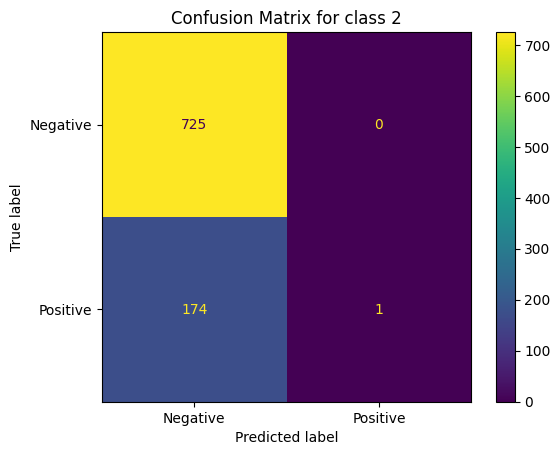

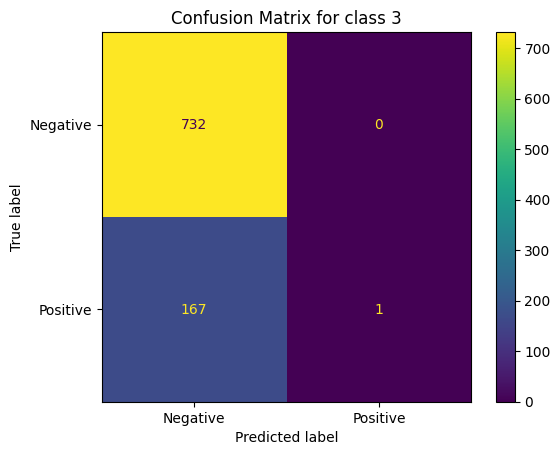

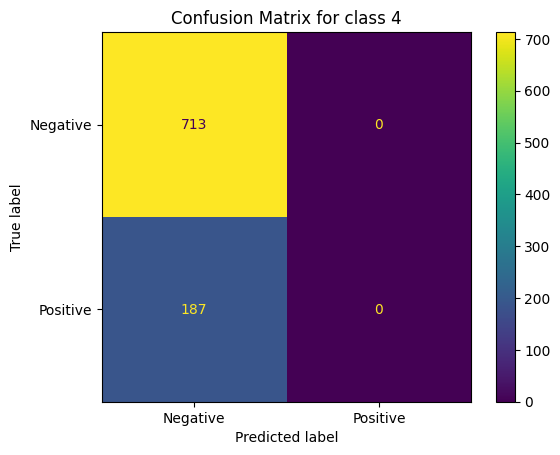

In [ ]:
for i in range(5):
    y_pred_binary = (y_pred_probs[:, i] >= 0.5).astype(int)
    y_true_binary = y_test[:, i]

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
    plt.title(f"Confusion Matrix for class {i}")
    plt.show()

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.0)

In [ ]:
# Everything after the first 3500 rows in train_df
train_df_rest = train_df.iloc[3500:]

# Everything after the first 900 rows in test_df
test_df_rest = test_df.iloc[900:]

In [ ]:
num_classes = sampled_games['label'].max() + 1

X_train2, y_train2 = load_images(train_df_rest, poster_dir, num_classes=num_classes)
X_test2, y_test2 = load_images(test_df_rest, poster_dir, num_classes=num_classes)

In [ ]:
history = basic.fit(X_train2, y_train2, epochs=12, batch_size=100, validation_split=0.2)

# Print training results
print("Training history keys:", history.history.keys())

# Example: Print accuracy and loss after training
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

Epoch 1/12
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - AUC: 0.5046 - accuracy: 0.1825 - binary accuracy: 0.7773 - loss: 0.5648 - val_AUC: 0.6210 - val_accuracy: 0.3111 - val_binary accuracy: 0.7822 - val_loss: 0.5059
Epoch 2/12
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - AUC: 0.5392 - accuracy: 0.2045 - binary accuracy: 0.7813 - loss: 0.5337 - val_AUC: 0.5989 - val_accuracy: 0.2222 - val_binary accuracy: 0.7867 - val_loss: 0.5125
Epoch 3/12
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - AUC: 0.5543 - accuracy: 0.2198 - binary accuracy: 0.7835 - loss: 0.5294 - val_AUC: 0.5663 - val_accuracy: 0.2444 - val_binary accuracy: 0.7867 - val_loss: 0.5139
Epoch 4/12
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - AUC: 0.6137 - accuracy: 0.3164 - binary accuracy: 0.7914 - loss: 0.5064 - val_AUC: 0.5616 - val_accuracy: 0.2222 - val_binary accuracy: 0.7867 - val_loss: 0.5142
Epoch 5/12
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - AUC: 0.6463 - accuracy: 0.3505 - binary accuracy: 0.7915 - loss: 0.4917 - val_AUC: 0.5778 - val_accura

In [ ]:
results = basic.evaluate(X_test2, y_test2, verbose=1)
print("Test Loss:", results[0])
print("Binary Accuracy:", results[1])
print("AUC:", results[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step - AUC: 0.5614 - accuracy: 0.1290 - binary accuracy: 0.7742 - loss: 0.5576
Test Loss: 0.5575622320175171
Binary Accuracy: 0.12903225421905518
AUC: 0.7741935849189758


29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 495ms/step


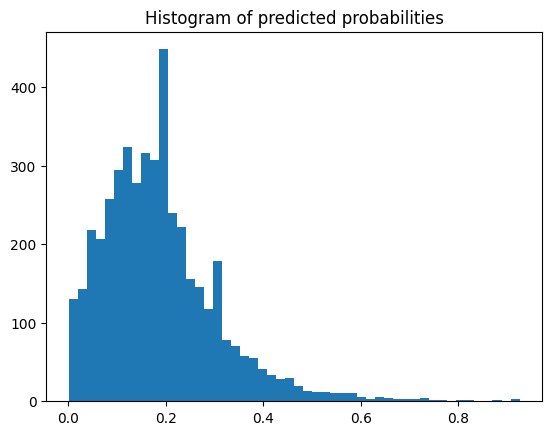

In [ ]:
import matplotlib.pyplot as plt

y_pred_probs = basic.predict(X_test)
plt.hist(y_pred_probs.flatten(), bins=50)
plt.title("Histogram of predicted probabilities")
plt.show()

In [ ]:
print("Mean positive label rate:", y_train.mean())

print("Mean predicted probability:", np.mean(y_pred_probs))

threshold = 0.2
y_pred_binary = (y_pred_probs >= threshold).astype(int)

from sklearn.metrics import accuracy_score, f1_score
print("Binary Accuracy:", accuracy_score(y_test.flatten(), y_pred_binary.flatten()))
print("F1 Score:", f1_score(y_test.flatten(), y_pred_binary.flatten()))

Mean positive label rate: 0.20794285714285715
Mean predicted probability: 0.18683176
Binary Accuracy: 0.5762222222222222
F1 Score: 0.2757311052031903


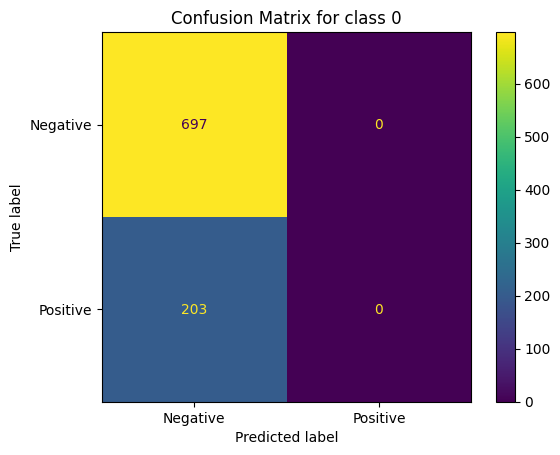

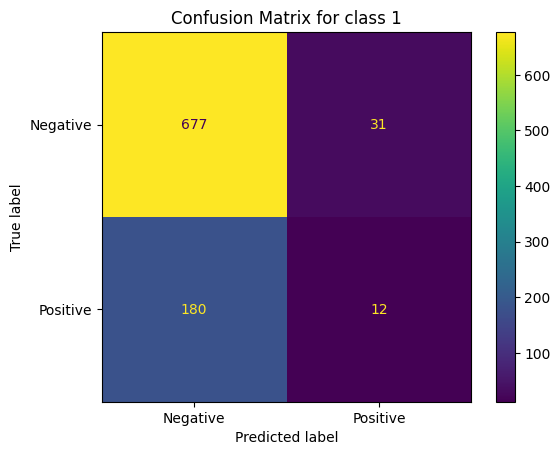

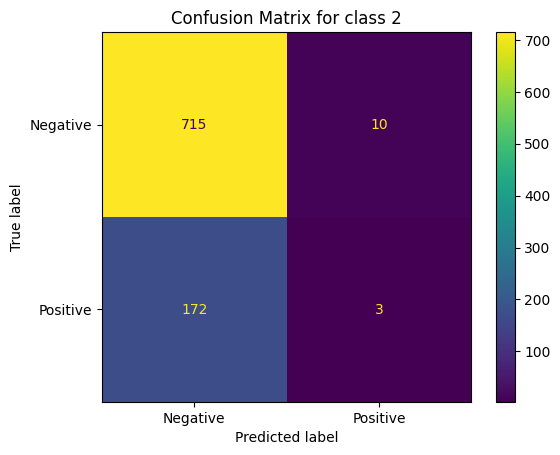

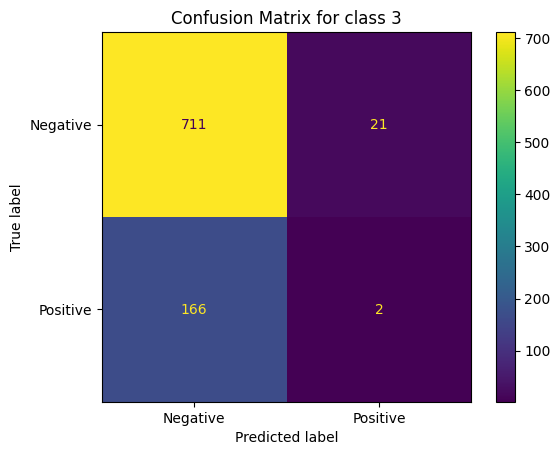

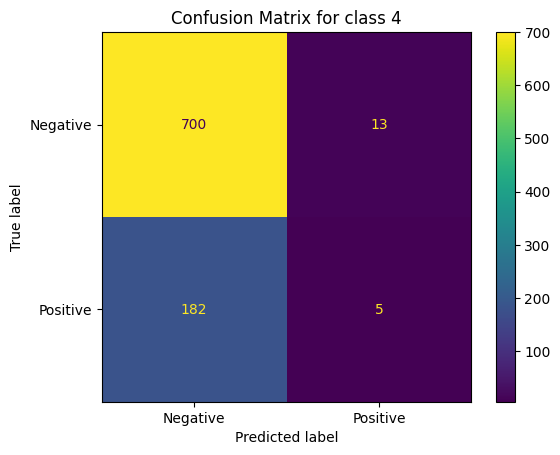

In [ ]:
for i in range(5):
    y_pred_binary = (y_pred_probs[:, i] >= 0.5).astype(int)
    y_true_binary = y_test[:, i]

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
    plt.title(f"Confusion Matrix for class {i}")
    plt.show()

In [ ]:
history = basic.fit(X_train, y_train, epochs=12, batch_size=100, validation_split=0.2)

# Print training results
print("Training history keys:", history.history.keys())

# Example: Print accuracy and loss after training
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

Epoch 1/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 164s 6s/step - AUC: 0.6663 - accuracy: 0.3755 - binary accuracy: 0.7955 - loss: 0.4857 - val_AUC: 0.5210 - val_accuracy: 0.2229 - val_binary accuracy: 0.7891 - val_loss: 0.5384
Epoch 2/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 198s 6s/step - AUC: 0.7235 - accuracy: 0.4251 - binary accuracy: 0.8061 - loss: 0.4531 - val_AUC: 0.5257 - val_accuracy: 0.2200 - val_binary accuracy: 0.7797 - val_loss: 0.5476
Epoch 3/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 209s 6s/step - AUC: 0.7586 - accuracy: 0.4598 - binary accuracy: 0.8125 - loss: 0.4315 - val_AUC: 0.5350 - val_accuracy: 0.2200 - val_binary accuracy: 0.7831 - val_loss: 0.5525
Epoch 4/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - AUC: 0.8014 - accuracy: 0.5216 - binary accuracy: 0.8261 - loss: 0.4003 - val_AUC: 0.5335 - val_accuracy: 0.2271 - val_binary accuracy: 0.7723 - val_loss: 0.5842
Epoch 5/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 160s 6s/step - AUC: 0.8281 - accuracy: 0.5369 - binary accuracy: 0.8364 - loss: 0.3792 - val_AUC: 0.54

In [ ]:
results = basic.evaluate(X_test2, y_test2, verbose=1)
print("Test Loss:", results[0])
print("Binary Accuracy:", results[1])
print("AUC:", results[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step - AUC: 0.5504 - accuracy: 0.2258 - binary accuracy: 0.7742 - loss: 1.0794
Test Loss: 1.079418420791626
Binary Accuracy: 0.22580644488334656
AUC: 0.774193525314331


29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 839ms/step


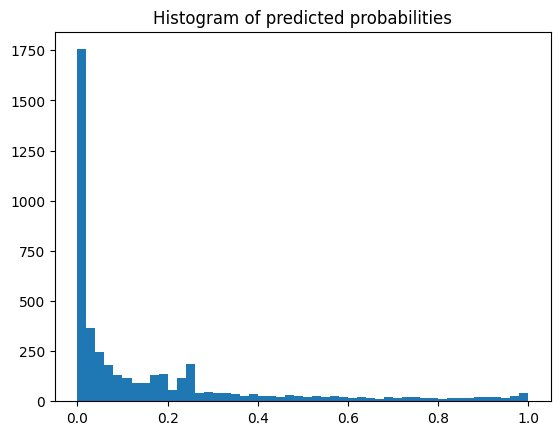

In [ ]:
y_pred_probs = basic.predict(X_test)
plt.hist(y_pred_probs.flatten(), bins=50)
plt.title("Histogram of predicted probabilities")
plt.show()

In [ ]:
print("Mean positive label rate:", y_train.mean())

print("Mean predicted probability:", np.mean(y_pred_probs))

threshold = 0.2
y_pred_binary = (y_pred_probs >= threshold).astype(int)

from sklearn.metrics import accuracy_score, f1_score
print("Binary Accuracy:", accuracy_score(y_test.flatten(), y_pred_binary.flatten()))
print("F1 Score:", f1_score(y_test.flatten(), y_pred_binary.flatten()))

Mean positive label rate: 0.20794285714285715
Mean predicted probability: 0.16627914
Binary Accuracy: 0.6415555555555555
F1 Score: 0.2577082374597331


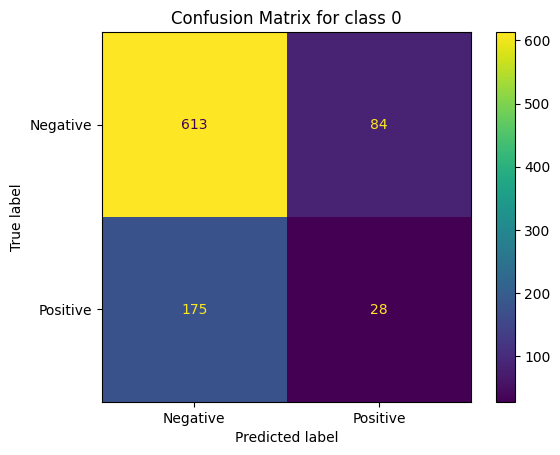

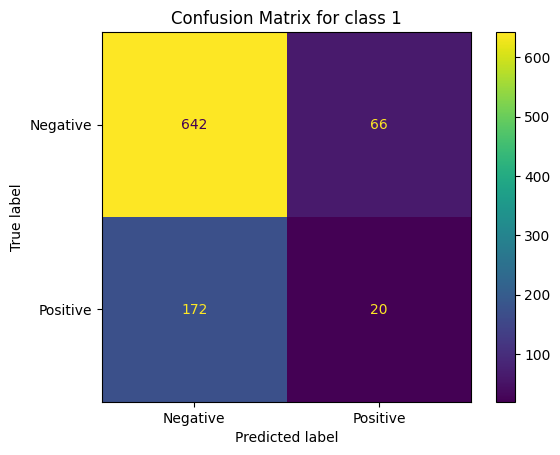

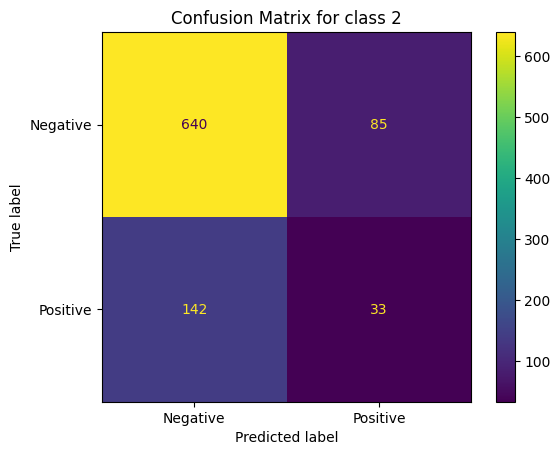

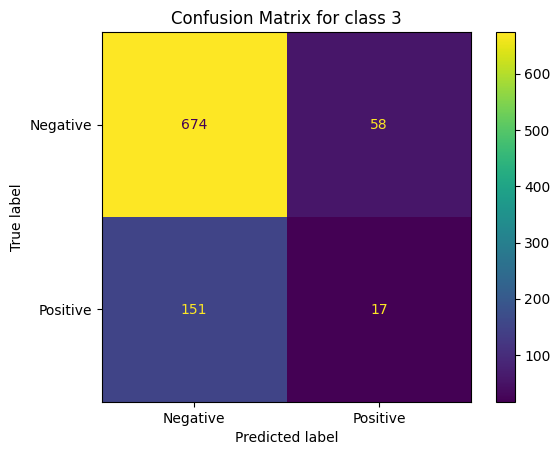

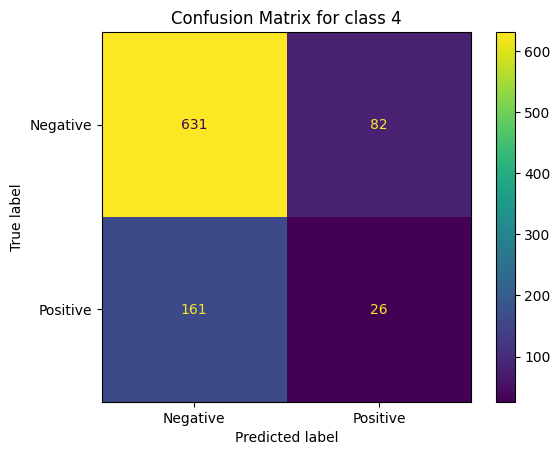

In [ ]:
for i in range(5):
    y_pred_binary = (y_pred_probs[:, i] >= 0.5).astype(int)
    y_true_binary = y_test[:, i]

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
    plt.title(f"Confusion Matrix for class {i}")
    plt.show()

In [ ]:
basic.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 15)   │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 15)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 25)   │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 40)     │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 40)     │        14,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │       460,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,465,757 (5.59 MB)

 Trainable params: 488,585 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 977,172 (3.73 MB)